**BÜYÜK VERİ FİNAL

Tarık Öztürk 150202032 

Amacımız veri setinde var olan verilerden yararlanarak sonraki ay için satış tahmini yapmaktır.


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics 
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/competitive-data-science-predict-future-sales/sample_submission.csv
/kaggle/input/competitive-data-science-predict-future-sales/shops.csv
/kaggle/input/competitive-data-science-predict-future-sales/items.csv
/kaggle/input/competitive-data-science-predict-future-sales/item_categories.csv
/kaggle/input/competitive-data-science-predict-future-sales/sales_train.csv
/kaggle/input/competitive-data-science-predict-future-sales/test.csv


sales datasını okuyup ilk 5 satırını kontrol edelim.

In [2]:
sales_data = pd.read_csv("../input/competitive-data-science-predict-future-sales/sales_train.csv")

In [3]:
sales_data.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


diğer datalar içinde aynısını yapıyoruz.

In [4]:
itemcategories_data = pd.read_csv('../input/competitive-data-science-predict-future-sales/item_categories.csv')
items_data = pd.read_csv('../input/competitive-data-science-predict-future-sales/items.csv')
shops_data = pd.read_csv('../input/competitive-data-science-predict-future-sales/shops.csv')
test_data = pd.read_csv('../input/competitive-data-science-predict-future-sales/test.csv')

In [5]:
itemcategories_data.info()
itemcategories_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   item_category_name  84 non-null     object
 1   item_category_id    84 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.4+ KB


,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [6]:
items_data.info()
items_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22170 entries, 0 to 22169
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   item_name         22170 non-null  object
 1   item_id           22170 non-null  int64 
 2   item_category_id  22170 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 519.7+ KB


,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [7]:
shops_data.info()
shops_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   shop_name  60 non-null     object
 1   shop_id    60 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [8]:
test_data.info()
test_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214200 entries, 0 to 214199
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   ID       214200 non-null  int64
 1   shop_id  214200 non-null  int64
 2   item_id  214200 non-null  int64
dtypes: int64(3)
memory usage: 4.9 MB


,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [9]:
shops_data.isnull().sum()


shop_name    0
shop_id      0
dtype: int64

In [10]:
sales_data.isnull().sum()


date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
dtype: int64

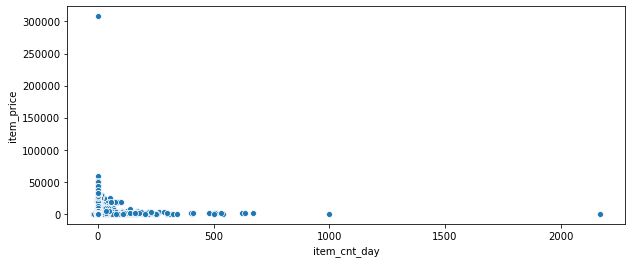

In [11]:
plt.figure(figsize=(10,4))
sns.scatterplot(x=sales_data.item_cnt_day, y=sales_data.item_price, data=sales_data)

In [12]:
sales_data = sales_data[sales_data.item_price<45000]
sales_data = sales_data[sales_data.item_cnt_day<600]

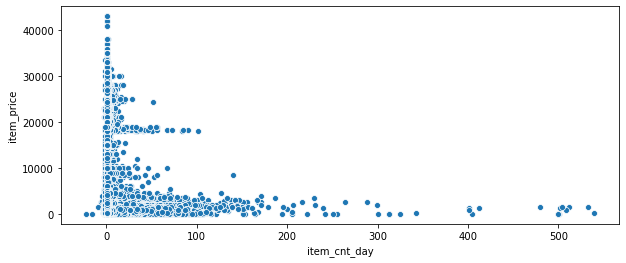

In [13]:
plt.figure(figsize=(10,4))
sns.scatterplot(x=sales_data.item_cnt_day, y=sales_data.item_price, data=sales_data)

In [14]:
sales_train_sub = sales_data
sales_train_sub['month'] = pd.DatetimeIndex(sales_train_sub['date']).month
sales_train_sub['year'] = pd.DatetimeIndex(sales_train_sub['date']).year
sales_train_sub.head(10)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,month,year
0,02.01.2013,0,59,22154,999.00,1.0,2,2013
1,03.01.2013,0,25,2552,899.00,1.0,3,2013
2,05.01.2013,0,25,2552,899.00,-1.0,5,2013
3,06.01.2013,0,25,2554,1709.05,1.0,6,2013
4,15.01.2013,0,25,2555,1099.00,1.0,1,2013
5,10.01.2013,0,25,2564,349.00,1.0,10,2013
6,02.01.2013,0,25,2565,549.00,1.0,2,2013
7,04.01.2013,0,25,2572,239.00,1.0,4,2013
8,11.01.2013,0,25,2572,299.00,1.0,11,2013
9,03.01.2013,0,25,2573,299.00,3.0,3,2013


In [15]:
satıs_grup = sales_train_sub.groupby(["date_block_num","shop_id","item_id"])["item_cnt_day"].agg('sum').reset_index()

x=satıs_grup.iloc[:,:-1]
y=satıs_grup.iloc[:,-1:]
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.25, random_state=0)

In [16]:
x

,date_block_num,shop_id,item_id
0,0,0,32
1,0,0,33
2,0,0,35
3,0,0,43
4,0,0,51
...,...,...,...
1609115,33,59,22087
1609116,33,59,22088
1609117,33,59,22091
1609118,33,59,22100


In [17]:
from sklearn.ensemble import ExtraTreesRegressor
etr = ExtraTreesRegressor(n_estimators=25,random_state=16)
etr.fit(x_train,y_train.values.ravel())
y_pred = etr.predict(x_test)


print("R2 Score:",r2_score(y_test,y_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred, squared=False))

R2 Score: 0.5992981885711897
Mean Absolute Error: 1.2022376454211001
Root Mean Squared Error: 5.12731259682364
